# Reading our flights Data

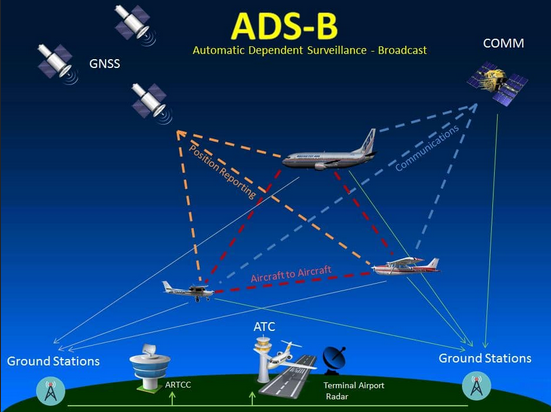

In [3]:
import findspark
findspark.init()
import pyspark # only run after findspark.init()
from pyspark.sql import SparkSession
from pyspark.context import SparkContext 
from pyspark.sql.functions import *
spark = SparkSession.builder.getOrCreate()#create spark session 
sc = spark.sparkContext#create sparkContext
from pyspark.sql.types import  (StructType, 
                                StructField, 
                                DateType, 
                                BooleanType,
                                DoubleType,
                                IntegerType,
                                StringType,
                                DecimalType,
                                LongType,
                                ArrayType,
                                TimestampType)
sample_schema = StructType([StructField("id",  IntegerType(), True),
                            StructField("timeAtServer", DoubleType(), True),
                            StructField("aircraft",  IntegerType(), True ),
                            StructField("latitude", DoubleType(), True),
                            StructField("longitude", DoubleType(), True  ),
                            StructField("baroAltitude", DoubleType(), True ),
                            StructField("geoAltitude", DoubleType(), True ),
                            StructField("numM",IntegerType(), True),
                            StructField("measurements", StringType(), True)           
                            ])
sample_aircarft = spark.read.csv("C:/PFE/TEST/training_1_category_1.csv",
                       header = True, 
                        schema = sample_schema)
#eleminating null data 
sample_aircarft.na.drop(how = 'all')
sample_aircarft.dropDuplicates()
sample_aircarft_filtred=sample_aircarft.filter((sample_aircarft.latitude !=0) & (sample_aircarft.longitude != 0) & (sample_aircarft.baroAltitude != 0)& (sample_aircarft.measurements != 'NA'))
#let's check our work !
sample_aircarft_filtred.filter((sample_aircarft_filtred["latitude"] == "") | sample_aircarft_filtred["latitude"].isNull() | isnan(sample_aircarft_filtred["latitude"])).count()
#Amazing  we have 0 null , 0 nan  values !!!! 

0

# CSV of airports with correct names 

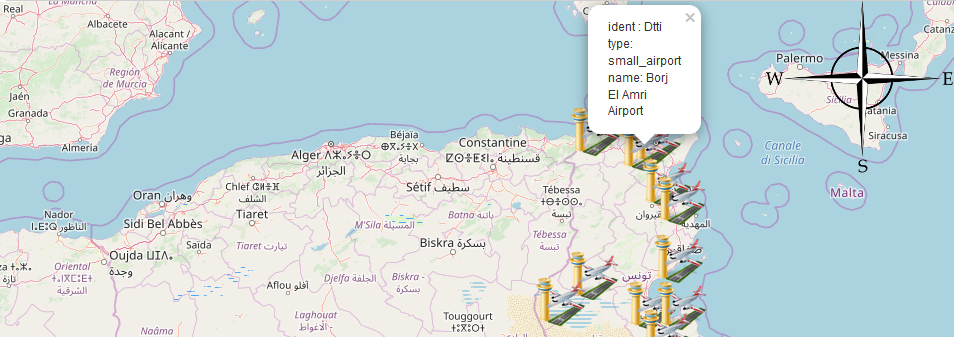

In [4]:
airport_schema = StructType([StructField("id",IntegerType(), True),
                            StructField("ident", StringType(), True),
                            StructField("type", StringType(), True ),
                            StructField("name", StringType(), True),
                            StructField("latitude_deg", DoubleType(), True  ),
                            StructField("longitude_deg", DoubleType(), True ),
                            StructField("elevation_ft", DoubleType(), True ),
                            StructField("continent",StringType(), True),
                            StructField("iso_country",StringType(), True),
                            StructField("iso_region", StringType(), True),
                            StructField("municipality", StringType(), True),
                            StructField("scheduled_service", StringType(), True),
                            StructField("gps_code", StringType(), True),
                             StructField("iata_code", StringType(), True),
                            StructField("local_code", StringType(), True),
                            StructField("home_link", StringType(), True),
                             StructField("wikipedia_link", StringType(), True),
                            StructField("keywords", StringType(), True)
                            ])
airport = spark.read.csv("C:/PFE/TEST/airports.csv",
                       header = True, 
                        schema = airport_schema)
print('The number of airports :' + str(airport.count()))
airport.show(3)

The number of airports :55536
+------+-----+-------------+--------------------+--------------+------------------+------------+---------+-----------+----------+------------+-----------------+--------+---------+----------+---------+--------------+--------+
|    id|ident|         type|                name|  latitude_deg|     longitude_deg|elevation_ft|continent|iso_country|iso_region|municipality|scheduled_service|gps_code|iata_code|local_code|home_link|wikipedia_link|keywords|
+------+-----+-------------+--------------------+--------------+------------------+------------+---------+-----------+----------+------------+-----------------+--------+---------+----------+---------+--------------+--------+
|  6523|  00A|     heliport|   Total Rf Heliport|40.07080078125|-74.93360137939453|        11.0|       NA|         US|     US-PA|    Bensalem|               no|     00A|     null|       00A|     null|          null|    null|
|323361| 00AA|small_airport|Aero B Ranch Airport|     38.704022|      

# Sort our data  by distinct aircraft and time at server 

In [5]:
sorted_flights =sample_aircarft.orderBy('aircraft','timeAtServer')
sorted_flights.show(5)

+----+-----------------+--------+----------------+----------------+------------+-----------+----+--------------------+
|  id|     timeAtServer|aircraft|        latitude|       longitude|baroAltitude|geoAltitude|numM|        measurements|
+----+-----------------+--------+----------------+----------------+------------+-----------+----+--------------------+
| 299|0.523000001907349|       2|49.8963643736759|8.40246252111487|      2400.3|     2400.3|   3|[[440,1509552325,...|
| 615| 1.11700010299683|       2|49.8959454035355|8.40149750580659|     2407.92|    2407.92|   2|[[101,2104674703,...|
| 847| 1.54299998283386|       2|49.8956660901086|8.40075518633868|     2415.54|    2415.54|   3|[[101,2524676140,...|
|1117| 2.03600001335144|       2|49.8952789306641|8.39991519325658|     2423.16|    2423.16|   2|[[101,3024702015,...|
|1685| 3.12700009346008|       2|49.8945953886388|8.39786014041385|      2438.4|    2446.02|   2|[[440,4109714750,...|
+----+-----------------+--------+---------------

# List of the  top Tracking aircrafts   

In [6]:
sample_aircarft.groupBy('aircraft').count().orderBy(desc("count")).show(3)

+--------+-----+
|aircraft|count|
+--------+-----+
|    2595| 6259|
|     148| 6251|
|    1495| 6046|
+--------+-----+
only showing top 3 rows



# Tracking a specific flight trip 2595

In [7]:
trip2595=sorted_flights.filter('aircraft= 2595').orderBy('timeAtServer')
trip2595.count()
trip2595.show(5)
print('The number of reported positions of trip 2595 are  :' + str(trip2595.count()))

+------+----------------+--------+----------------+----------------+------------+-----------+----+--------------------+
|    id|    timeAtServer|aircraft|        latitude|       longitude|baroAltitude|geoAltitude|numM|        measurements|
+------+----------------+--------+----------------+----------------+------------+-----------+----+--------------------+
|194580|358.653000116348|    2595|51.2770106428761|6.74598693847656|      388.62|     312.42|   2|[[394,35962950587...|
|199431|367.542000055313|    2595|51.2736123295154| 6.7376708984375|      502.92|     441.96|   2|[[436,36851969496...|
|200991| 370.44000005722|    2595|51.2723693847656|6.73506453230574|      525.78|     464.82|   2|[[436,37141974425...|
|201282|370.998000144959|    2595|51.2721226579052|6.73446655273438|       533.4|     472.44|   2|[[436,37197984593...|
|201598|371.580000162125|    2595|51.2716827392578|6.73372835726351|      541.02|     487.68|   2|[[436,37256011128...|
+------+----------------+--------+------

# Calcul-Geohash: airports/flight2595 reported  positions  

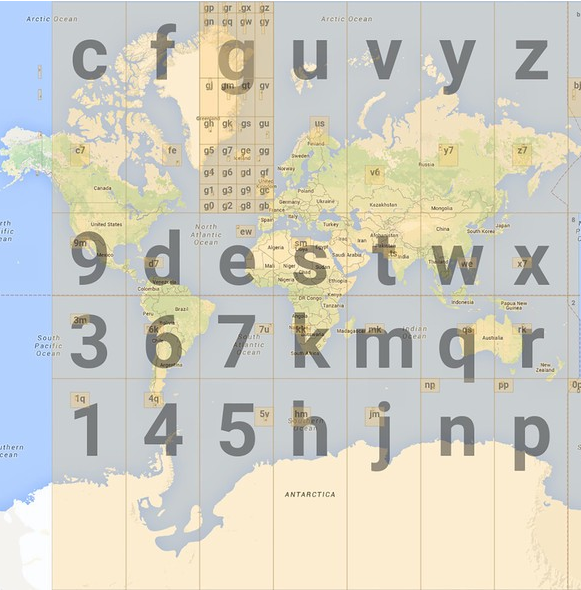

The Power of Geohash:
    
-Geohashes are a little complicated ,but the key thing to know is that it divides the world into a number of squares in a grid.

-By doing this, we can eliminate most of the data upfront and only focus on the square our potential targets are in.

-It’s a pretty elegant solution.


'''Geohash length----Cell width----Cell height

1 	≤ 5,000km 	× 	5,000km

2 	≤ 1,250km 	× 	625km

3 	≤ 156km 	× 	156km

4 	≤ 39.1km 	× 	19.5km

5 	≤ 4.89km 	× 	4.89km

6 	≤ 1.22km 	× 	0.61km

7 	≤ 153m 	× 	153m

8 	≤ 38.2m 	× 	19.1m

9 	≤ 4.77m 	× 	4.77m

10 	≤ 1.19m 	× 	0.596m

11 	≤ 149mm 	× 	149mm

12 	≤ 37.2mm 	× 	18.6mm'''



In [8]:
import geohash2
import pyspark.sql.functions as F
from pyspark.sql.functions import *
from pyspark.sql.types import *
from pyspark.sql.types import StringType
import pandas as pd
from math import radians, cos, sin, asin, sqrt
from geopy.geocoders import Nominatim
from geopy.extra.rate_limiter import RateLimiter
udf1 = F.udf(lambda x,y: geohash2.encode(x,y,precision=4))
trip2595_hash=trip2595.select('latitude','longitude','geoAltitude','timeAtServer')
trip2595_hash=trip2595_hash.withColumn('Hash_Aircraft', udf1('latitude','longitude'))
airport_hash=airport.select('name','latitude_deg','longitude_deg','elevation_ft')
airport_hash=airport_hash.withColumn('Hash_Airport', udf1('latitude_deg','longitude_deg'))
airport_hash.show(3)
trip2595_hash.show(3)

+--------------------+--------------+------------------+------------+------------+
|                name|  latitude_deg|     longitude_deg|elevation_ft|Hash_Airport|
+--------------------+--------------+------------------+------------+------------+
|   Total Rf Heliport|40.07080078125|-74.93360137939453|        11.0|        dr4e|
|Aero B Ranch Airport|     38.704022|       -101.473911|      3435.0|        9wzu|
|        Lowell Field|   59.94919968|    -151.695999146|       450.0|        bdsj|
+--------------------+--------------+------------------+------------+------------+
only showing top 3 rows

+----------------+----------------+-----------+----------------+-------------+
|        latitude|       longitude|geoAltitude|    timeAtServer|Hash_Aircraft|
+----------------+----------------+-----------+----------------+-------------+
|51.2770106428761|6.74598693847656|     312.42|358.653000116348|         u1hg|
|51.2736123295154| 6.7376708984375|     441.96|367.542000055313|         u1hg|

# Loking for Geohash neigbours of each point of our aircraft.

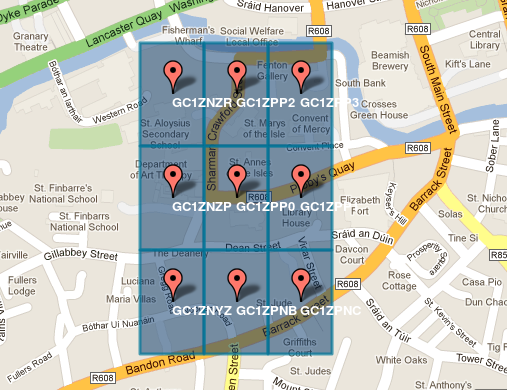

In [9]:
from geolib import geohash                 
neighbours = geohash.neighbours('u1hg9w8')
neighbours

Neighbours(n='u1hg9wb', ne='u1hg9wc', e='u1hg9w9', se='u1hg9w3', s='u1hg9w2', sw='u1hg9qr', w='u1hg9qx', nw='u1hg9qz')

# left outer join :all trip data+matched airports  for each reported position .

In [10]:
trip2595_hash_leftjoin= trip2595_hash.join(airport_hash,trip2595_hash.Hash_Aircraft==airport_hash.Hash_Airport,how='left_outer')
trip2595_hash_leftjoin.select('timeAtServer','Hash_Aircraft','Hash_Airport').show(5)

+----------------+-------------+------------+
|    timeAtServer|Hash_Aircraft|Hash_Airport|
+----------------+-------------+------------+
|358.653000116348|         u1hg|        u1hg|
|358.653000116348|         u1hg|        u1hg|
|358.653000116348|         u1hg|        u1hg|
|358.653000116348|         u1hg|        u1hg|
|367.542000055313|         u1hg|        u1hg|
+----------------+-------------+------------+
only showing top 5 rows



#  Name and Distance of nearest airport in each time  in area=S≤ 39.1km × 19.5km

In [11]:
import geohash2
from math import radians, cos, sin, asin, sqrt
from geopy.distance import geodesic
from geopy.geocoders import Nominatim
from geopy.extra.rate_limiter import RateLimiter
def get_distance_2d(lat_1, lng_1, lat_2, lng_2): 
    A =(lat_1, lng_1)
    B = (lat_2, lng_2)
    d=geodesic(A, B).kilometers
    return d
udf_get_distance_2d = F.udf(get_distance_2d)
trip2595_nearest_airports=trip2595_hash_leftjoin.withColumn('Distance_2d', udf_get_distance_2d('latitude','longitude','latitude_deg','longitude_deg').cast(DoubleType()))
trip2595_nearest_airports.orderBy('timeAtServer','Distance_2d').select('name','timeAtServer','Distance_2d').show(5)

+--------------------+----------------+------------------+
|                name|    timeAtServer|       Distance_2d|
+--------------------+----------------+------------------+
|  Düsseldorf Airport|358.653000116348|2.0088728761329593|
|Düsseldorf-Wolfsa...|358.653000116348| 7.650614787442875|
| Meiersberg Airfield|358.653000116348|14.899237388288398|
|Hilden-Kesselweie...|358.653000116348|18.830411044870228|
|  Düsseldorf Airport|367.542000055313| 2.692512828766492|
+--------------------+----------------+------------------+
only showing top 5 rows



# The nearest airports informations  at first reported point (timeAtServer" == "358.653000116348") of our aircraft

In [12]:
trip2595_nearest_airports.filter(trip2595_nearest_airports.timeAtServer==358.653000116348).select('name','latitude_deg','longitude_deg','elevation_ft','Hash_Airport','Distance_2d').show()

+--------------------+------------+-------------+------------+------------+------------------+
|                name|latitude_deg|longitude_deg|elevation_ft|Hash_Airport|       Distance_2d|
+--------------------+------------+-------------+------------+------------+------------------+
|  Düsseldorf Airport|   51.289501|      6.76678|       147.0|        u1hg|2.0088728761329593|
| Meiersberg Airfield|     51.2996|       6.9565|       520.0|        u1hg|14.899237388288398|
|Hilden-Kesselweie...|     51.1873|       6.9746|       300.0|        u1hg|18.830411044870228|
|Düsseldorf-Wolfsa...|     51.2649|       6.8539|       375.0|        u1hg| 7.650614787442875|
+--------------------+------------+-------------+------------+------------+------------------+



# Ploting the trajectory of the plane in 2D 

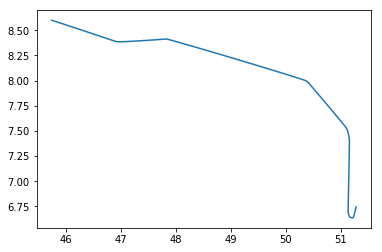

In [13]:
import plotly.graph_objs as go
import pandas as pd
import requests
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
trip2595_pandas_DataFrame = pd.DataFrame.from_records(trip2595.collect(), columns=trip2595.columns)
plt.plot(trip2595_pandas_DataFrame['latitude'], trip2595_pandas_DataFrame['longitude'])

# Ploting the trajectory elevation of the plane

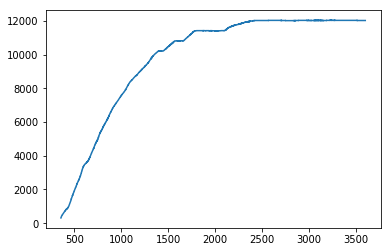

In [14]:
plt.plot(trip2595_pandas_DataFrame['timeAtServer'],trip2595_pandas_DataFrame['geoAltitude'])

# Ploting 3D our aircraft with the nearest airports in each time 

In [15]:
import plotly.offline as py
import numpy as np
trip2595_nearest_airports_pandas_DataFrame = pd.DataFrame.from_records(trip2595_nearest_airports.collect(), columns=trip2595_nearest_airports.columns)
_data = [go.Scatter3d(x=trip2595_nearest_airports_pandas_DataFrame['latitude'], 
         y=trip2595_nearest_airports_pandas_DataFrame['longitude'], z=trip2595_nearest_airports_pandas_DataFrame['geoAltitude'], name = 'Aircraft_plot',mode='lines+markers', text=trip2595_nearest_airports_pandas_DataFrame['Distance_2d'])]
_data1 = [go.Scatter3d(x=trip2595_nearest_airports_pandas_DataFrame['latitude_deg'], 
         y=trip2595_nearest_airports_pandas_DataFrame['longitude_deg'], z=trip2595_nearest_airports_pandas_DataFrame['elevation_ft'], name = 'Airport_plot',mode='markers',marker_color='rgba(152, 0, 0, .8)',
                                text=trip2595_nearest_airports_pandas_DataFrame['name'])]


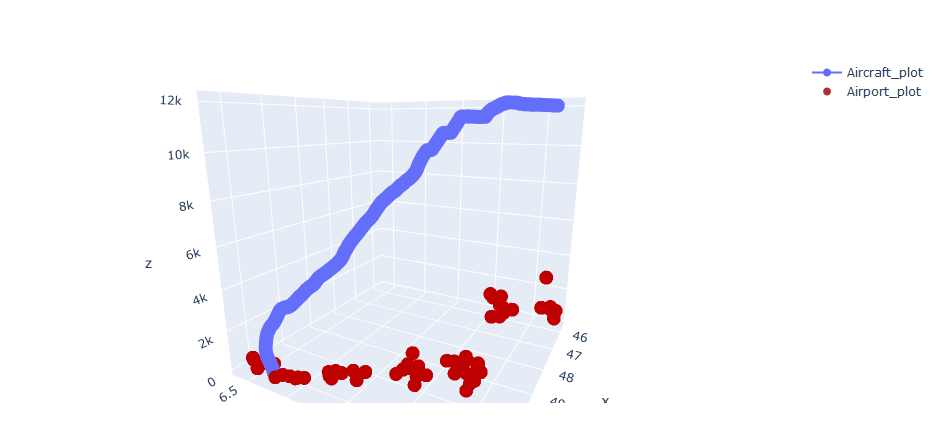

# Plot our trip/nearest airports  in real Map 

In [16]:
import folium
from folium.plugins import FloatImage
from folium import plugins
# generate a new map
folium_map = folium.Map()
trip2595_nearest_airports_pandas_DataFrame['latitude'] = pd.to_numeric(trip2595_nearest_airports_pandas_DataFrame['latitude'],errors='coerce')
trip2595_nearest_airports_pandas_DataFrame['longitude'] = pd.to_numeric(trip2595_nearest_airports_pandas_DataFrame['longitude'],errors='coerce')
trip2595_nearest_airports_pandas_DataFrame['latitude'] = trip2595_nearest_airports_pandas_DataFrame['latitude'].astype(float)
trip2595_nearest_airports_pandas_DataFrame['longitude'] = trip2595_nearest_airports_pandas_DataFrame['longitude'].astype(float)
trip2595_nearest_airports_pandas_DataFrame['latitude_deg'] = pd.to_numeric(trip2595_nearest_airports_pandas_DataFrame['latitude_deg'],errors='coerce')
trip2595_nearest_airports_pandas_DataFrame['longitude_deg'] = pd.to_numeric(trip2595_nearest_airports_pandas_DataFrame['longitude_deg'],errors='coerce')
trip2595_nearest_airports_pandas_DataFrame['latitude_deg'] = trip2595_nearest_airports_pandas_DataFrame['latitude_deg'].astype(float)
trip2595_nearest_airports_pandas_DataFrame['longitude_deg'] = trip2595_nearest_airports_pandas_DataFrame['longitude_deg'].astype(float)
trip2595_nearest_airports_pandas_DataFrame= trip2595_nearest_airports_pandas_DataFrame.dropna()
#for index, row in  trip2595_nearest_airports_pandas_DataFrame.iterrows():
 #   folium.Marker([float(row['latitude']),float( row['longitude'])],
  #       icon=folium.features.CustomIcon('http://icons.iconarchive.com/icons/google/noto-emoji-travel-places/256/42586-airplane-icon.png',icon_size=(15, 15))
   #      ).add_to(folium_map)
#for index, row in  trip2595_nearest_airports_pandas_DataFrame.iterrows():
 #   folium.Marker([float(row['latitude_deg']),float( row['longitude_deg'])],
   #      icon=folium.features.CustomIcon('https://cdn.icon-icons.com/icons2/973/PNG/512/Airport_icon-icons.com_74913.png',icon_size=(15, 15))
  #       ).add_to(folium_map)
#folium_map

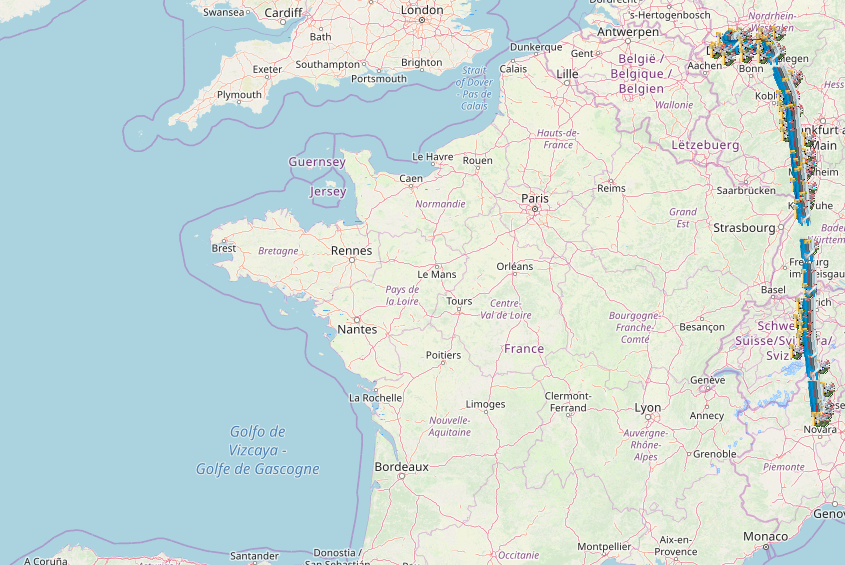

## Start position(Departure)-End Position(Arrival)

In [17]:
start = trip2595_nearest_airports_pandas_DataFrame.iloc[0,:]
finish = trip2595_nearest_airports_pandas_DataFrame.iloc[-1,:]
start

latitude                     51.277
longitude                   6.74599
geoAltitude                  312.42
timeAtServer                358.653
Hash_Aircraft                  u1hg
name             Düsseldorf Airport
latitude_deg                51.2895
longitude_deg               6.76678
elevation_ft                    147
Hash_Airport                   u1hg
Distance_2d                 2.00887
Name: 0, dtype: object

In [18]:
folium.Marker([float(start['latitude']),float( start['longitude'])],
        icon=folium.features.CustomIcon('http://icons.iconarchive.com/icons/google/noto-emoji-travel-places/256/42586-airplane-icon.png',icon_size=(30, 30))
       ).add_to(folium_map)
folium.Marker([float(start['latitude_deg']),float( start['longitude_deg'])],
   icon=folium.features.CustomIcon('https://cdn.icon-icons.com/icons2/973/PNG/512/Airport_icon-icons.com_74913.png',icon_size=(30, 30))
  ).add_to(folium_map)
folium.Marker([float(finish['latitude']),float( finish['longitude'])],
        icon=folium.features.CustomIcon('http://icons.iconarchive.com/icons/google/noto-emoji-travel-places/256/42586-airplane-icon.png',icon_size=(30, 30))
       ).add_to(folium_map)
folium.Marker([float(finish['latitude_deg']),float( finish['longitude_deg'])],
   icon=folium.features.CustomIcon('https://cdn.icon-icons.com/icons2/973/PNG/512/Airport_icon-icons.com_74913.png',icon_size=(30, 30))
  ).add_to(folium_map)
#folium_map

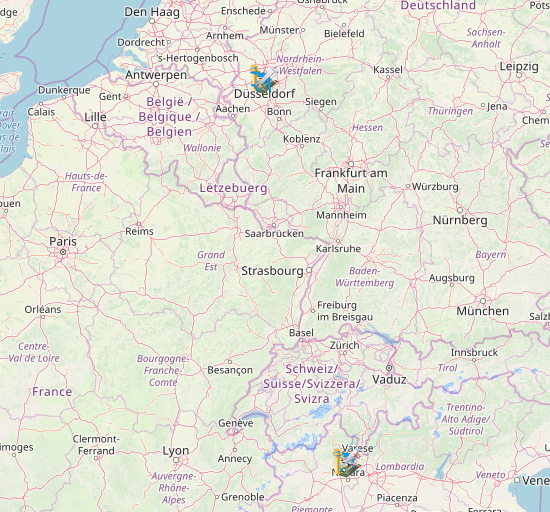

# Distance en KM :departure- final reported point :

In [22]:
get_distance_2d(start['latitude'],start['longitude'],finish['latitude'],finish['longitude'])

629.7124235157607

# Cruising speed  km per hour :km/h

In [25]:
V=(629.7124235157607*3600)/(finish['timeAtServer']-start['timeAtServer']) 
print('Cruising speed in km/h is ' + str(V)) 
print ("Look for your type of aircraft in table: ")

Cruising speed in km/h is 699.4667446212621
look for your type of aircraft in table: 


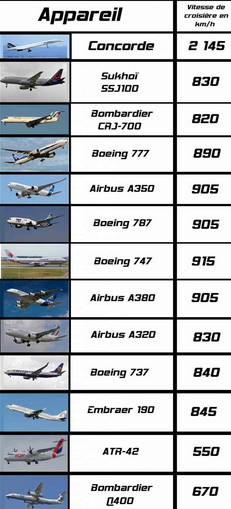